In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv(r"C:\Users\User\Desktop\weather.csv", parse_dates=True, index_col=0)

In [6]:
data.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,,,,,,,,,,,,,,,,,,,,,
8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [7]:
data.isna()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,,,,,,,,,,,,,,,,,,,,,
8.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13.7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13.3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7.6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7.1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12.5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [9]:
data.isnull().sum()

MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [12]:
#remove "dirty" columns
#too many entries with Nan, more than 100 rows
#remove with non-numeric values
dataset=data.drop(['WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

In [13]:
dataset.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
MinTemp,,,,,,,,,,,,,,
8.0,24.3,0.0,3.4,6.3,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes
14.0,26.9,3.6,4.4,9.7,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes
13.7,23.4,3.6,5.8,3.3,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes
13.3,15.5,39.8,7.2,9.1,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes
7.6,16.1,2.8,5.6,10.6,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No


In [14]:
#remove rows with missing data
dataset_clean=dataset.dropna()

In [15]:
len(dataset)

366

In [16]:
len(dataset_clean)

356

In [17]:
dataset_clean.columns

Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [19]:
X=dataset_clean[dataset_clean.columns[:-1]]
y=dataset_clean['RainTomorrow']
y=np.array([0 if value == 'No' else 1 for value in y])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [21]:
clf=Perceptron(random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8089887640449438

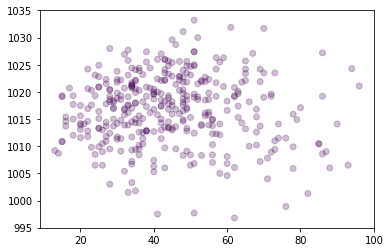

In [22]:
fig,ax=plt.subplots()
y_pred=clf.predict(X)
ax.scatter(x=X['Humidity3pm'],y=X['Pressure3pm'], c=y_pred, alpha=.25)